# Scale-free network

The present notebook details some definitions and an topology implementation of Scale-Free network. Moreover, for another explanation see: [Introduction Videos](https://www.youtube.com/watch?v=pYMsI-8GsxI)

## Definition
A network is called scale-free if the characteristics of the network are independent of the size of the network, i.e. the number of nodes. That means that when the network grows, the underlying structure remains the same.

<img src="https://farm6.staticflickr.com/5572/14840495571_81ca4e1ebe_o.png" width="400" >

A scale-free network is defined by the distribution of the number of edges of the nodes following a so called power law distribution. That is, the fraction P(k) of nodes in the network having k connections to other nodes goes for large values of k as

$${\displaystyle P(k)\ \sim \ k^{\boldsymbol {-\gamma }}}$$

where ${\displaystyle \gamma }$ is a parameter whose value is typically in the range $2 < \displaystyle \gamma  < 3$. [Wiki](https://en.wikipedia.org/wiki/Scale-free_network)

## Difference between power-law and normal distributions

A crucial difference between the normal and power-law distribution is that the number of nodes with really high numbers of edges is much higher in the power-law distribution than in the normal distribution. But generally well connected nodes are more common in a normal distribution.

<img src="https://farm4.staticflickr.com/3878/14820775726_dd8b85ae27_o.png" width="400" >

The normal distribution is less frequently observed in networks. This is the case because the distribution of edges in a network is mostly not the result of the sequence of independent quantities. Networks grow over time.

## Growth and Preferential Attachment

There are two major components that explain the emergence of the scale-free property in a complex networks: the growth and the preferential attachment:


1. **Growth**: a growth process where over an extended period of time, new nodes join an already existing system, a network.
2. **Preferential Attachment**: is called a new coming node who prefers to connect to another node which has already a certain number of links with others. 

Thus, there is a higher probability that more and more nodes will link themselves to that one which has already many links, leading this node to a **hub** in-fine. Depending on the network, the hubs might either be assortative or disassortative.

Preferential attachment looks like a plausible hypothesis for social networks in particular. It is attractive to be connected to people who are already highly connected.





## Properties

*   **Fault tolerant.** Large scale-free networks are not vulnerable to random attacks at nodes. They are vulnerable to targeted attacks at the few **hub** nodes. But the network will often not lose connectedness if one hub fails, due to the fact that other hubs remain. 

*   **Fractal-like.** Large scale-free networks present a fractal-like property by the associated power law distribution.

*   **Small World Properties.** Large scale-free networks present small wall properties such as:
  * Low average distances between nodes.
  * High clustering
  * Small worl principle: any node is on average connected to any other in a small number of steps.
  
* **Generative Mechanism.** The more specific characteristics of scale-free networks vary with the generative mechanism used to create them. For instance, according to the place of the first high-degree nodes (hubs), we could place these nodes in the **middle**, or in the **periphery** of the network



## Code Implementation



### Libraries

First, we import some important libraries. Here, we export a library known as Networkx to simplify the procedures. See the following link for references [Networkx Documentation](https://networkx.github.io/documentation/stable/tutorial.html)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In this part, we created a ScaleFreeNetwork class for the implementation. This class inherits of the Graph class of Networkx library.

For the graph creation, we start form the assumption that the Scale Free Network can be create using a pre-created graph until get a total number of $N$ nodes (considering the nodes of the pre-created graph and the new added nodes). In this way, if no pre-created graph is defined, the more basic process creates a Scale-Free Network using a graph with two connected nodes as base.

This scale-free network is constructed by progressively adding nodes to an existing network and introducing links to existing nodes with preferential attachment so that the probability of linking to a given node $i$ is proportional to the number of existing links $k_i$ that node has

$$P(\text{linking to node i}) \sim \frac{k_i}{\sum_j k_j}$$

In [ ]:
class ScaleFreeNetwork(nx.Graph):
  def __init__(self, N , pre_created_graph = None):
    """Define a scale free network with N total number of nodes. 
      Also, you can provide a pre-created graph to add new nodes
      in the sense of a ScaleFree Network.
    """
    nx.Graph.__init__(self)  #import the attributes of the super class
    if (pre_created_graph is None):
      self.add_node(0)
      self.add_node(1)
      self.add_edge(0,1)
    else:
      self.add_nodes_from(pre_created_graph.nodes)
      self.add_edges_from(pre_created_graph.edges)

    self.N = N
    self.__create_graph()

  #Create the graph of the network given the N total number of nodes
  #This network starts from a graph with two connected nodes or a specific pre-created graph
  def __create_graph(self):
    """Create a scale-free graph with N nodes.
       The graph starts with some nodes, and continues adding 
       new nodes until get a total of N nodes. 
    """
    num_nodes = len(self.nodes)

    if (self.N <= num_nodes):
      print("INCORRECT: Set values of N > {0}".format(num_nodes))
      return


    for new_node in range(num_nodes,self.N):
        self.__adding_edges(new_node)

  def __adding_edges(self,new_node):
    """Defines the neighbors of the new node.Each node of the graph has a probability
          p = k_i / sum_k_j
       of being selected, where k_i is the connections of the i-node and
       cum_k_j is the cumulative connections of all the nodes of the graph. """


    sum_k_j = 0
    for node , _ in self.nodes.items():
      k_j = len(list(self.neighbors(node))) #the links of each node
      sum_k_j += k_j

    probabilities = []
    for node , _ in self.nodes.items():
      k_i = len(list(self.neighbors(node))) #the links of each node
      prob = k_i / sum_k_j
      probabilities.append(prob)

    # we use the np.random.choice function that selects a random number in the list
    # based on probabilities
    random_neighbor = np.random.choice(a=list(self.nodes), p=probabilities)
    
    self.add_edge(new_node,random_neighbor) 

  #Function to plot the structure of the network
  def draw_network(self,node_color='blue', node_size=25, with_labels=False):
    """
    Draw the graph.
        
    node_size: the size of all the nodes
    node_color: the coloe of all the nodes
    with_labels: True or False to show the ids of the nodes
    """
    nx.draw(self, node_color=node_color, node_size=node_size, with_labels=with_labels)
    plt.draw()
    plt.show()

    
    
    


Creating a network and plotting the topology

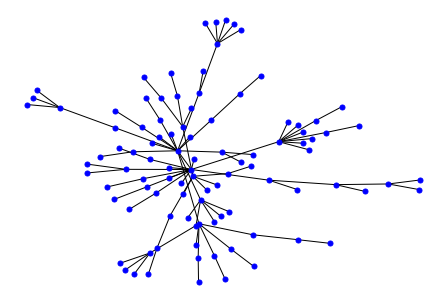

In [ ]:
SFN = ScaleFreeNetwork(100)
SFN.draw_network()


Creating an additional network.

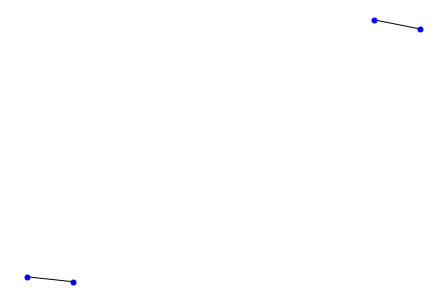

In [ ]:
#Additional Network
G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_edge(1,2)

G.add_node(3)
G.add_node(4)
G.add_edge(3,4)

nx.draw(G,node_color='blue', node_size=25, with_labels=False)
plt.draw()
plt.show()

Creating a Scale-free topology from the previous network.

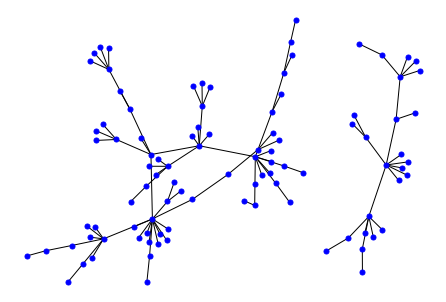

In [ ]:
SFN = ScaleFreeNetwork(100,G)
SFN.draw_network()

### Authorship

*   Oscar Guarnizo

